# Geospatial Analysis of Brazilian E-Commerce


## CEP: the Brazilian Zip Code
Mã zip của Brazil, còn được gọi là CEP, là viết tắt của Mã địa chỉ bưu chính (*Código de Endereçamento Postal*) và chứa 8 chữ số. Được giới thiệu vào năm 1972 dưới dạng một chuỗi gồm năm chữ số, nó được mở rộng thành tám chữ số vào năm 1992 để cho phép bản địa hóa chính xác hơn. Định dạng chuẩn là "nnnnn-nnn" (năm chữ số gốc, dấu gạch nối và ba chữ số mới).

**CEP:** 12.345-678

Hầu hết các thành phố có dân số khoảng 100.000 người trở lên đều có CEP được chỉ định cho mọi địa điểm công cộng và cho một số không gian riêng tư có hiệu suất sử dụng cao, như các tòa nhà thương mại lớn và chung cư dân cư lớn. Các thị trấn nhỏ được gán một mã chung gồm 5 chữ số, theo sau là hậu tố -000.

* phần đầu tiên bao gồm 5 chữ số đại diện cho Vùng, Tiểu vùng, Ngành, Phân ngành và Bộ chia phân ngành.
* phần thứ hai chứa 3 chữ số, được phân tách bằng dấu gạch ngang so với phần đầu tiên và nó đại diện cho Mã định danh phân phối.


In [ ]:
!pip install -q datashader
!pip install -q geoviews
!pip install -q jupyter_bokeh
!pip install --upgrade -q holoviews

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.0/557.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 14.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
import gdown

file_id_geo ='1ErKcD4coKkgfZWx6hU1CZSo93PC3TH_b'
output_path = 'olist_geolocation_dataset.csv'
gdown.download(f"https://drive.google.com/uc?id={file_id_geo}", output_path, quiet=True, fuzzy=True)

'olist_geolocation_dataset.csv'

# GeoSpacial Analysis

In [ ]:
geo = pd.read_csv(
    "olist_geolocation_dataset.csv",
    converters={"geolocation_zip_code_prefix": str},
)

# Lấy ba và bốn chữ số đầu tiên của mã zip, khám phá thêm điều này để hiểu cách hoạt động của mã zip
geo["geolocation_zip_code_prefix_1_digits"] = geo["geolocation_zip_code_prefix"].str[:1].astype(int)
geo["geolocation_zip_code_prefix_2_digits"] = geo["geolocation_zip_code_prefix"].str[:2].astype(int)
geo["geolocation_zip_code_prefix_3_digits"] = geo["geolocation_zip_code_prefix"].str[:3].astype(int)
geo["geolocation_zip_code_prefix_4_digits"] = geo["geolocation_zip_code_prefix"].str[:4].astype(int)

geo.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_3_digits,geolocation_zip_code_prefix_4_digits
0,01037,-23.545621,-46.639292,sao paulo,SP,0,1,10,103
1,01046,-23.546081,-46.644820,sao paulo,SP,0,1,10,104
2,01046,-23.546129,-46.642951,sao paulo,SP,0,1,10,104


Có 19.051 zip_code_prefix khác nhau. Trung bình có 52,6 tọa độ cho mỗi tiền tố. Nhưng có một tiền tố có sẵn tọa độ 1.146.

In [ ]:
geo['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

,count
count,19015.000000
mean,52.598633
std,72.057907
min,1.000000
25%,10.000000
50%,29.000000
75%,66.500000
max,1146.000000


Có một số tọa độ ngoại lệ trong tập dữ liệu nằm ngoài lãnh thổ Brazil. Hãy đảm bảo rằng tất cả tọa độ đều nằm trong một hình chữ nhật được giới hạn bởi giới hạn của Brazil.

In [ ]:
# Removing some outliers
geo = geo[
    (geo.geolocation_lat <= 5.27438888)
    & (geo.geolocation_lng >= -73.98283055)
    & (geo.geolocation_lat >= -33.75116944)
    & (geo.geolocation_lng <= -34.79314722)
]

In [ ]:
from datashader.utils import lnglat_to_meters as webm
geo["x"], geo["y"] = webm(geo.geolocation_lng, geo.geolocation_lat)

Sau đó, chúng tôi xử lý tọa độ vĩ độ và kinh độ và chuyển đổi chúng thành Tọa độ Mercator x/y.

In [ ]:
geo.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_3_digits,geolocation_zip_code_prefix_4_digits,x,y
0,01037,-23.545621,-46.639292,sao paulo,SP,0,1,10,103,-5.191862e+06,-2.698137e+06
1,01046,-23.546081,-46.644820,sao paulo,SP,0,1,10,104,-5.192478e+06,-2.698193e+06
2,01046,-23.546129,-46.642951,sao paulo,SP,0,1,10,104,-5.192270e+06,-2.698199e+06


### Zip Codes in Brazil
Cuối cùng vẽ tọa độ trên bản đồ. Chúng ta thấy có mối liên hệ giữa tiền tố mã zip và vị trí của mã zip đó. Điểm bắt đầu ở Sao Paulo, với tiền tố 01001, sau đó tăng dần độ hoàn thiện ngược chiều kim đồng hồ ở Rio Grande do Sul (phía nam Brazil), với tiền tố 99990.

In [ ]:
# transforming the prefixes to int for plotting purposes
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix_1_digits'].astype(int)
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix_2_digits'].astype(int)
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix_3_digits'].astype(int)
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix_4_digits'].astype(int)

In [ ]:
brazil = geo
agg_name = 'geolocation_zip_code_prefix'
brazil[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,1.000121e+06
mean,3.657332e+04
std,3.054939e+04
min,1.001000e+03
25%,1.107500e+04
50%,2.653000e+04
75%,6.350400e+04
max,9.999000e+04


In [ ]:
# plot with datashader - image with black background
import datashader as ds
from datashader import transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9
from IPython.core.display import HTML, display
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr

background = "black"
cm = partial(colormap_select, reverse=(background!="black"))
export = partial(export_image, background = background, export_path="export")
display(HTML("<style>.container { width:100% !important; }</style>"))
W = 700

def create_map(data, cmap, data_agg, export_name='img'):
    pad = (data.x.max() - data.x.min())/50
    x_range, y_range = ((data.x.min() - pad, data.x.max() + pad),
                             (data.y.min() - pad, data.y.max() + pad))

    ratio = (y_range[1] - y_range[0]) / (x_range[1] - x_range[0])

    plot_width  = int(W)
    plot_height = int(plot_width * ratio)
    if ratio > 1.5:
        plot_height = 550
        plot_width = int(plot_height / ratio)

    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)

    agg = cvs.points(data, 'x', 'y', data_agg)
    img = tf.shade(agg, cmap=cmap, how='eq_hist')
    return export(img, export_name)

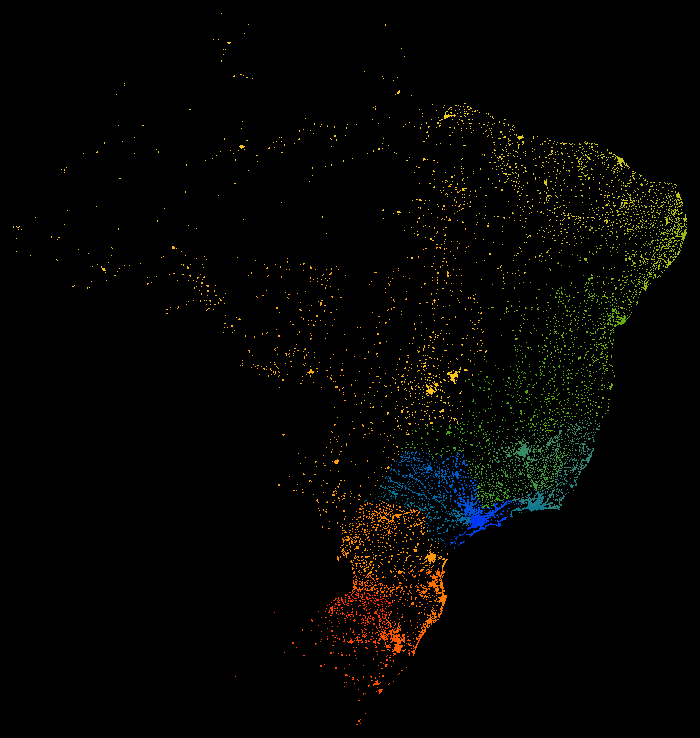

In [ ]:
create_map(brazil, rainbow, ds.mean(agg_name),'brazil_zip_codes')

## Zip Codes in States
Hãy nhìn vào bang Sao Paulo (SP) để xem tiền tố mã zip hoạt động như thế nào ở cấp khu vực. Chúng ta thấy rằng:
* tiền tố mã zip ở bang Sao Paulo nằm trong khoảng từ 01001 đến 19990
* mã zip bắt đầu bằng 0 nằm trong khu vực đô thị Sao Paulo
* mã zip bắt đầu bằng 1 nằm trong nội địa của tiểu bang

In [ ]:
def filter_data(level, name):
    df = geo[geo[level] == name]
    # remove outliers
    df = df[(df.x <= df.x.quantile(0.999)) & (df.x >= df.x.quantile(0.001))]
    df = df[(df.y <= df.y.quantile(0.999)) & (df.y >= df.y.quantile(0.001))]
    return df

In [ ]:
sp = filter_data('geolocation_state', 'SP')
agg_name = 'geolocation_zip_code_prefix'
sp[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,402651.000000
mean,9030.831782
std,5101.941134
min,1001.000000
25%,4661.000000
50%,8257.000000
75%,13330.000000
max,19990.000000


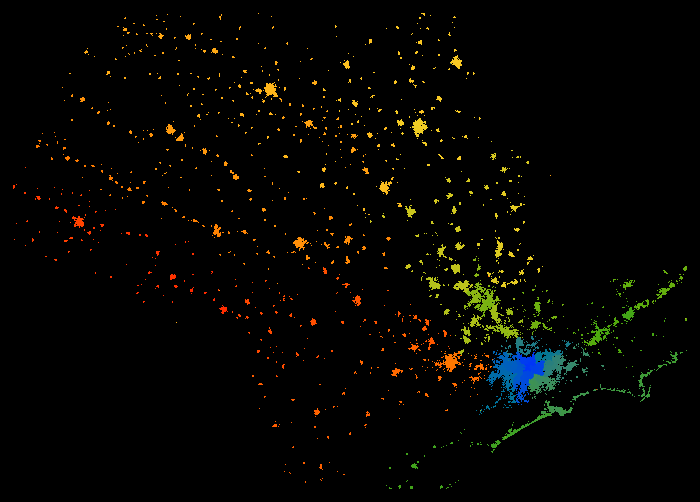

In [ ]:
create_map(sp, rainbow, ds.mean(agg_name), 'sp_zip_codes')

## Zip Codes in Large Cities
Hãy nhìn vào thành phố Sao Paulo để biết tiền tố mã zip hoạt động như thế nào ở cấp thành phố. Chúng ta thấy rằng:
* tiền tố mã zip ở thành phố Sao Paulo dao động từ 01001 đến 09540
* tiền tố mã zip bằng cách nào đó có liên quan đến các vùng lân cận hoặc quận thành phố

In [ ]:
saopaulo = filter_data('geolocation_city', 'sao paulo')
agg_name = 'geolocation_zip_code_prefix'
saopaulo[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,135256.000000
mean,4137.454996
std,1804.189554
min,1001.000000
25%,2941.000000
50%,4166.000000
75%,5158.000000
max,9540.000000


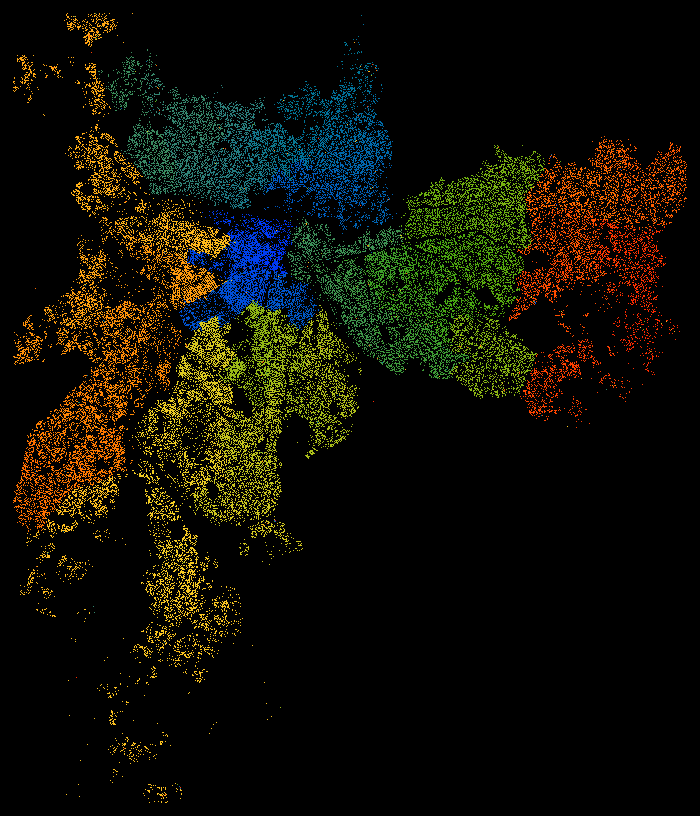

In [ ]:
create_map(saopaulo, rainbow, ds.mean(agg_name), 'sao_paulo_zip_codes')

## Zip Codes in Small Cities
Hãy nhìn vào thành phố Atibaia để xem tiền tố mã zip hoạt động như thế nào ở cấp thành phố. Chúng ta thấy rằng:
* tiền tố mã zip của thành phố Atibaia nằm trong khoảng từ 12940 đến 12954
* nhưng có những thành phố lân cận khác có cùng tiền tố mã zip
* để biết thêm chi tiết và đi xuống cấp thành phố, có lẽ chúng tôi sẽ cần nhiều chữ số mã zip hơn (chữ số thứ 4 và thứ 5)

In [ ]:
atibaia = geo[geo['geolocation_city'] == 'atibaia']
agg_name = 'geolocation_zip_code_prefix'
atibaia[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,1254.000000
mean,12945.042265
std,4.197704
min,12940.000000
25%,12942.000000
50%,12944.000000
75%,12948.000000
max,12954.000000


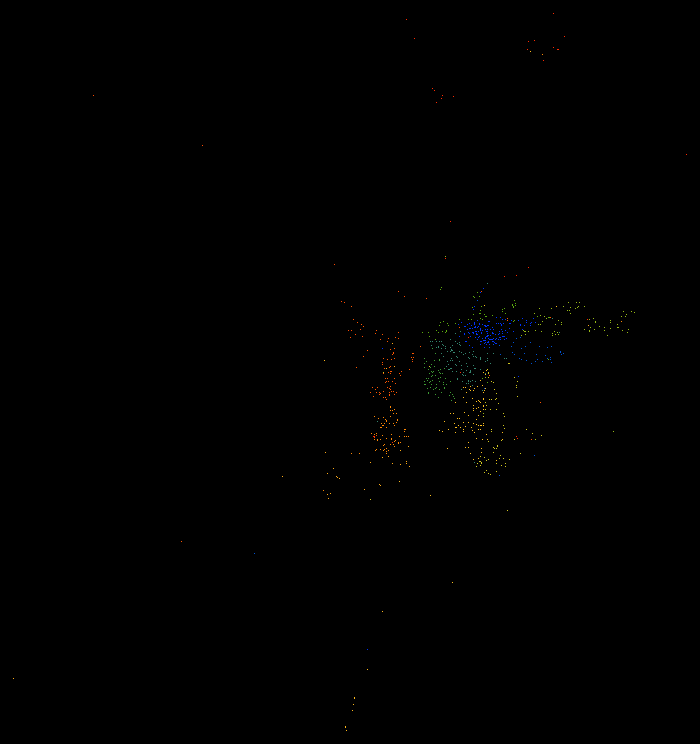

In [ ]:
create_map(atibaia, rainbow, ds.mean(agg_name), 'atibaia_zip_codes')

## Abrangence of zip code digits
Mỗi chữ số trong mã zip có nghĩa là gì? Hãy xem nó hoạt động như thế nào, từ 1 đến 5 chữ số.

**Mã zip bắt đầu bằng 2 đều đến từ các bang Rio de Janeiro (RJ) và Espírito Santo (ES)**

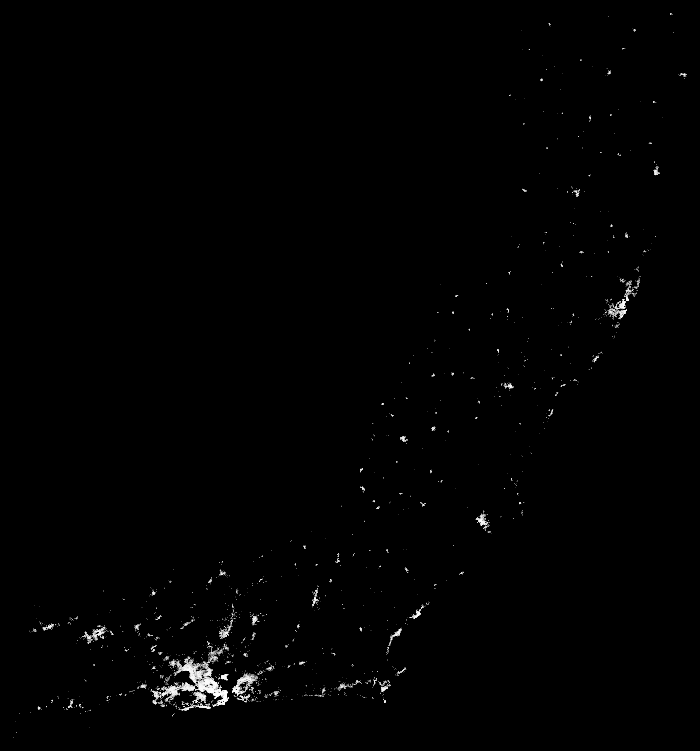

In [ ]:
# Zip code: 2
df = filter_data('geolocation_zip_code_prefix_1_digits', 2)
create_map(df, cm(Greys9), ds.count(), 'zip_code_2')

**Mã zip bắt đầu bằng 22 đều nằm trong Thành phố Rio de Janeiro, nhưng chúng đại diện cho nhiều vùng lân cận**

Từ phải sang trái, bạn thấy các khu phố như Leme, Copacabana, Ipanema, Leblon và Barra da Tijuca.

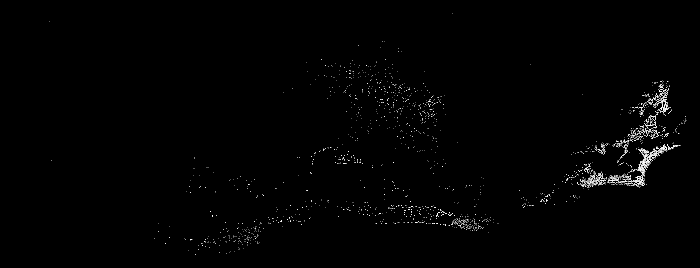

In [ ]:
# Zip code: 22
df = filter_data('geolocation_zip_code_prefix_2_digits', 22)
create_map(df, Greys9, ds.count(), 'zip_code_22')

**Mã zip bắt đầu bằng 220 đều nằm trong Copacabana, một vùng lân cận của Rio de Janeiro**

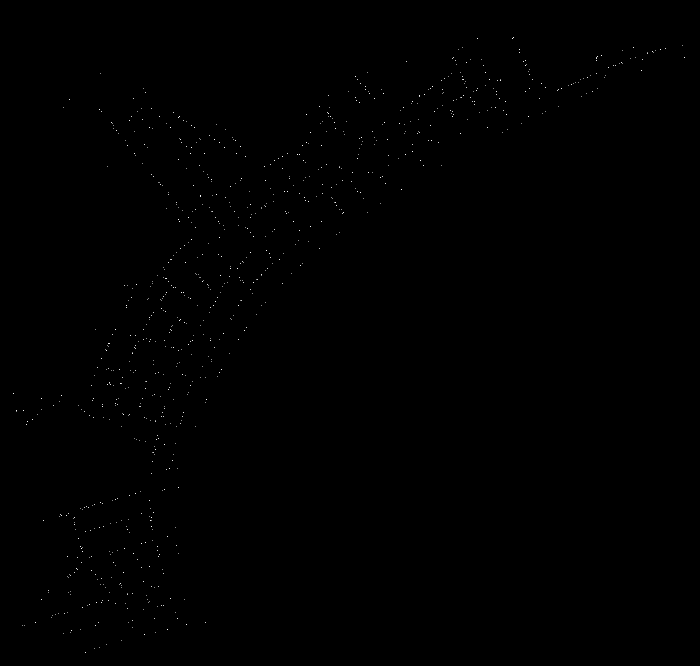

In [ ]:
# Zip code: 220
df = filter_data('geolocation_zip_code_prefix_3_digits', 220)
create_map(df, Greys9, ds.count(), 'zip_code_220')

**Mã zip bắt đầu bằng 2201 đại diện cho một số đường phố của Copacabana**

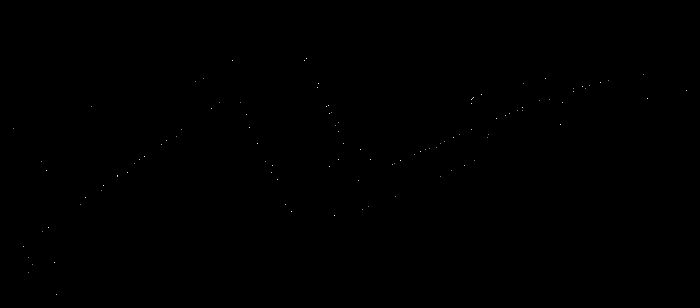

In [ ]:
# Zip code: 2201
df = filter_data('geolocation_zip_code_prefix_4_digits', 2201)
create_map(df, Greys9, ds.count(), 'zip_code_2201')

**Mã zip bắt đầu từ năm 2010 thể hiện các đường phố nghiêm ngặt hơn của Copacabana**

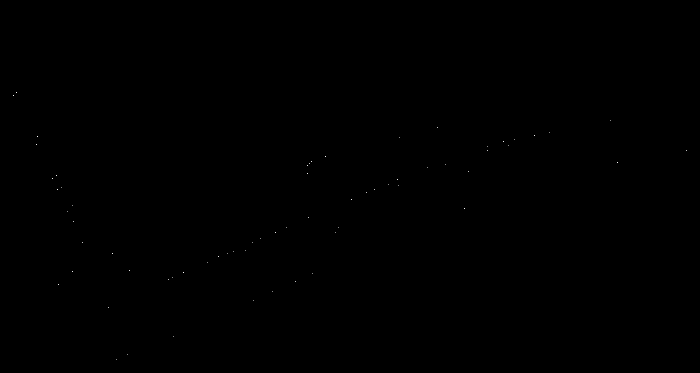

In [ ]:
# Zip code: 22010
df = filter_data('geolocation_zip_code_prefix', 22010)
create_map(df, Greys9, ds.count(), 'zip_code_22010')

## Doanh thu lớn nhất đến từ đâu?
Làm việc với 5 chữ số của mã zip có thể dẫn chúng ta đến các mẫu rất nhỏ ở một số khu vực, vì vậy chúng ta sẽ làm việc với 3 chữ số. Vẽ biểu đồ tổng giá trị sản phẩm được nhóm theo tiền tố mã zip, chúng ta thấy rằng phần lớn doanh thu đến từ khu vực Đông Nam và Nam Brazil. Cũng có thể thấy rằng các thành phố và thủ đô lớn, nơi dân số đông hơn, có sự tham gia lớn hơn vào doanh thu.

In [ ]:
file_id_order ='1MW8cENn7iDYNIlI3UZ4yguKhmmkMxWeS'
file_id_item ='1UHLZl8JVbLzl3hkCmi2dvYG2zyx3D6yg'
file_id_review ='1_8Zdnq5Jo_yakab3kuQ0GPzpVu5nuMph'
file_id_customer ='1kuEHXQK8HV6hyoEkEwFWCtPsM3vywrPB'


output_order_path = 'olist_orders_dataset.csv'
output_item_path = 'olist_order_items_dataset.csv'
output_review_path = 'olist_order_reviews_dataset.csv'
output_customer_path = 'olist_customers_dataset.csv'

gdown.download(f"https://drive.google.com/uc?id={file_id_order}", output_order_path, quiet=True,fuzzy=True)
gdown.download(f"https://drive.google.com/uc?id={file_id_item}", output_item_path, quiet=True,fuzzy=True)
gdown.download(f"https://drive.google.com/uc?id={file_id_review}", output_review_path, quiet=True,fuzzy=True)
gdown.download(f"https://drive.google.com/uc?id={file_id_customer}", output_customer_path, quiet=True,fuzzy=True)

'olist_customers_dataset.csv'

In [ ]:
orders_df = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
customer = pd.read_csv('olist_customers_dataset.csv', dtype={'customer_zip_code_prefix': str})

# getting the first 3 digits of customer zipcode
customer['customer_zip_code_prefix_3_digits'] = customer['customer_zip_code_prefix'].str[0:3]
customer['customer_zip_code_prefix_3_digits'] = customer['customer_zip_code_prefix_3_digits'].astype(int)

brazil_geo = geo.set_index('geolocation_zip_code_prefix_3_digits').copy()

In [ ]:
# merging the data
orders = orders_df.merge(order_items, on='order_id')
orders = orders.merge(customer, on='customer_id')
orders = orders.merge(order_reviews, on='order_id')

In [ ]:
gp = orders.groupby('customer_zip_code_prefix_3_digits')['price'].sum().to_frame()
revenue = brazil_geo.join(gp)
agg_name = 'revenue'
revenue[agg_name] = revenue.price / 1000

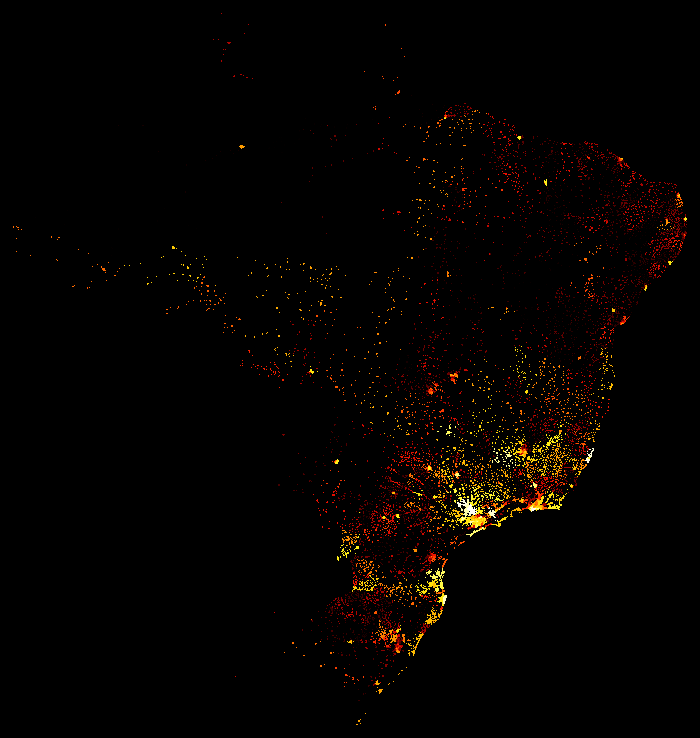

In [ ]:
create_map(revenue, fire, ds.mean(agg_name), 'revenue_brazil')

# Cước phí trung bình là gì?
Ở đây chúng ta thấy một điều gì đó bất ngờ. Khách hàng ở các khu vực phía nam và đông nam Brazil có giá cước trung bình thấp hơn so với các khách hàng ở khu vực phía bắc và đông bắc. Điều này có thể xảy ra vì họ phải trả nhiều tiền hơn cho cước vận chuyển (hãy kiểm tra điều đó sau)

In [ ]:
gp = orders.groupby('order_id').agg({'price': 'sum', 'customer_zip_code_prefix_3_digits': 'max'})
gp = gp.groupby('customer_zip_code_prefix_3_digits')['price'].mean().to_frame()
avg_ticket = brazil_geo.join(gp)
agg_name = 'avg_ticket'
avg_ticket[agg_name] = avg_ticket.price

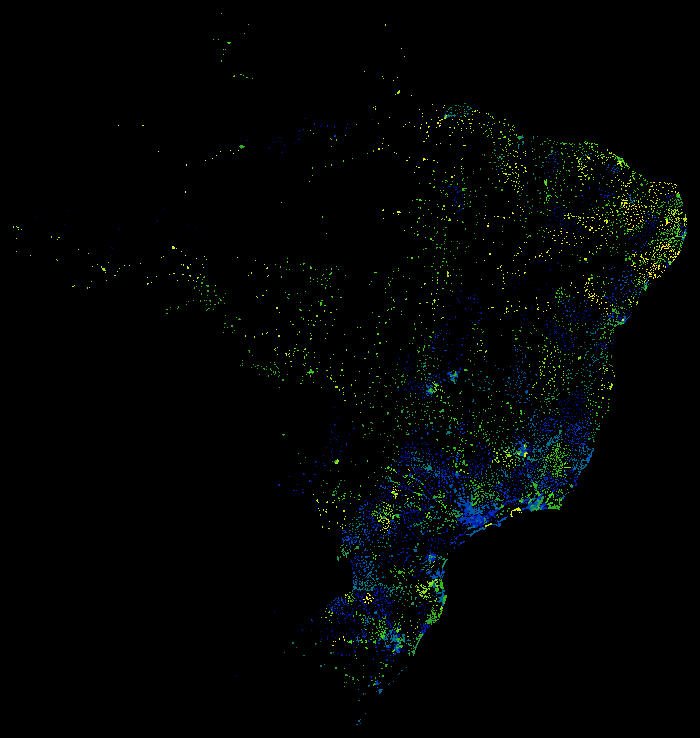

In [ ]:
create_map(avg_ticket, bgy, ds.mean('avg_ticket'), 'avg_ticket_brazil')

# Ai trả nhiều tiền hơn cho việc vận chuyển?
Chúng ta có thể tìm tỷ lệ cước phí bằng cách chia giá trị cước vận chuyển cho giá trị đơn hàng. Tỷ lệ này cho biết tỷ lệ phần trăm của giá sản phẩm mà một người phải trả chỉ để đơn hàng của họ được giao.
- Ví dụ: nếu một sản phẩm có giá R\$50,00 và giá trị vận chuyển là R\$10,00 thì tỷ lệ vận chuyển là 0,2 hoặc 20%. Tỷ lệ vận chuyển hàng hóa cao hơn rất có thể sẽ không khuyến khích khách hàng hoàn tất giao dịch mua hàng.

Do chi phí hậu cần, chúng ta dự kiến tỷ lệ vận chuyển hàng hóa sẽ thấp hơn ở các khu vực đông dân cư và tỷ lệ vận chuyển hàng hóa cao hơn ở các khu vực dân cư thưa thớt.

In [ ]:
gp = orders.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum', 'customer_zip_code_prefix_3_digits': 'max'})
agg_name = 'freight_ratio'
gp[agg_name] = gp.freight_value / gp.price
gp = gp.groupby('customer_zip_code_prefix_3_digits')[agg_name].mean().to_frame()
freight_ratio = brazil_geo.join(gp)

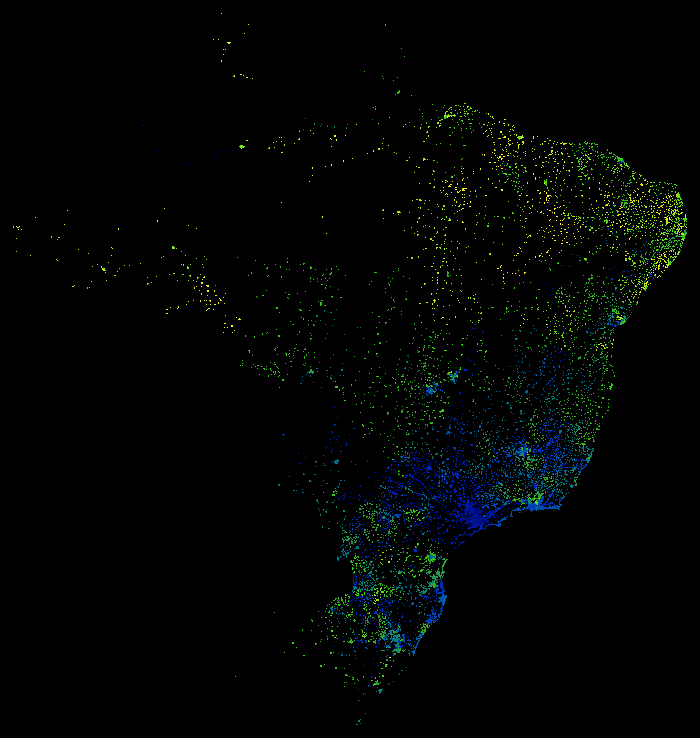

In [ ]:
create_map(freight_ratio, bgy, ds.mean('freight_ratio'), 'freight_ratio_brazil')

## Thời gian giao hàng trung bình
Thật không may, những người sống ở phía bắc và đông bắc Brazil phải chịu chi phí vận chuyển hàng hóa cao hơn và phải chờ lâu hơn để nhận được hàng.

In [ ]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['actual_delivery_time'] = orders.order_delivered_customer_date - orders.order_delivered_carrier_date
orders['actual_delivery_time'] = orders['actual_delivery_time'].dt.days

In [ ]:
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()
delivery_time = brazil_geo.join(gp)
agg_name = 'avg_delivery_time'
delivery_time[agg_name] = delivery_time['actual_delivery_time']

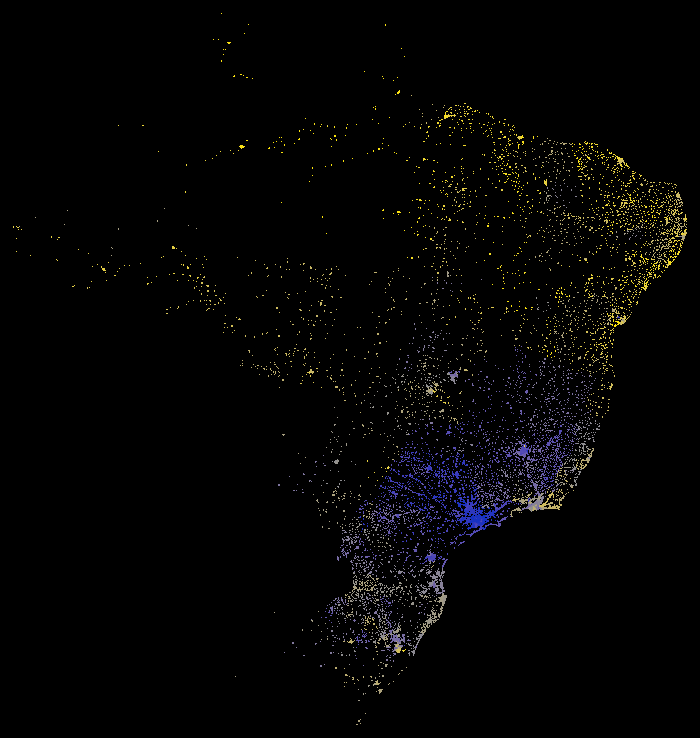

In [ ]:
create_map(delivery_time, bjy, ds.mean(agg_name), 'avg_delivery_time_brazil')

In [ ]:
pr = filter_data('geolocation_state', 'PR').set_index('geolocation_zip_code_prefix_3_digits')
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()
pr_delivery_time = pr.join(gp)
pr_delivery_time[agg_name] = pr_delivery_time['actual_delivery_time']

Hãy xem thời gian giao hàng ở cấp tiểu bang. Chúng tôi chỉ lọc các đơn đặt hàng từ bang Parana (PR). Có thể thấy rằng các thành phố lớn hơn có thời gian giao hàng trung bình thấp hơn các thành phố nhỏ hơn.

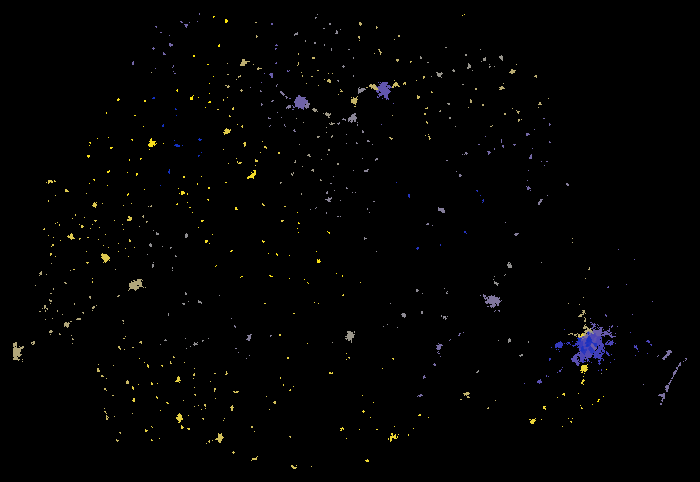

In [ ]:
create_map(pr_delivery_time, bjy, ds.mean(agg_name), 'avg_delivery_time_pr')

### Điểm thú vị về vùng ngoại ô Brazil
Không giống như các quốc gia khác, ở Brazil, những khu vực giàu có nhất thường nằm gần trung tâm thành phố và các vùng ngoại ô nổi tiếng với tình trạng nghèo đói và tỷ lệ bạo lực cao. Hãy cùng khám phá điều đó ở Rio the Janeiro.

In [ ]:
riodejaneiro = filter_data('geolocation_city', 'rio de janeiro').set_index('geolocation_zip_code_prefix_3_digits')
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()
rj_delivery_time = riodejaneiro.join(gp)
rj_delivery_time[agg_name] = rj_delivery_time['actual_delivery_time']

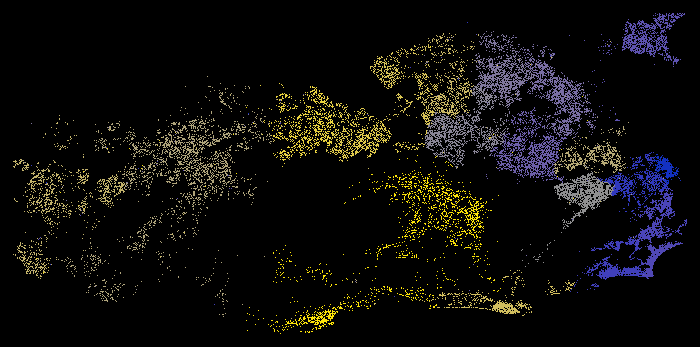

In [ ]:
create_map(rj_delivery_time, bjy, ds.mean(agg_name), 'rio_de_janeiro_avg_delivery_time')

Hóa ra là nếu bạn sống ở những khu dân cư giàu có như Downtown, Botafogo, Copacabana và Flamengo, bạn có thể nhận được đơn đặt hàng sớm hơn năm ngày so với những người sống ở khu dân cư nghèo như Cidade de Deus hoặc Bangu. Chúng tôi thấy mô hình tương tự ở Sao Paulo và Porto Alegre, khách hàng ở gần trung tâm thành phố nhận được đơn đặt hàng nhanh hơn những người sống ở ngoại ô.

In [ ]:
saopaulo = filter_data('geolocation_city', 'sao paulo').set_index('geolocation_zip_code_prefix_3_digits')
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()
sp_delivery_time = saopaulo.join(gp)
sp_delivery_time[agg_name] = sp_delivery_time['actual_delivery_time']

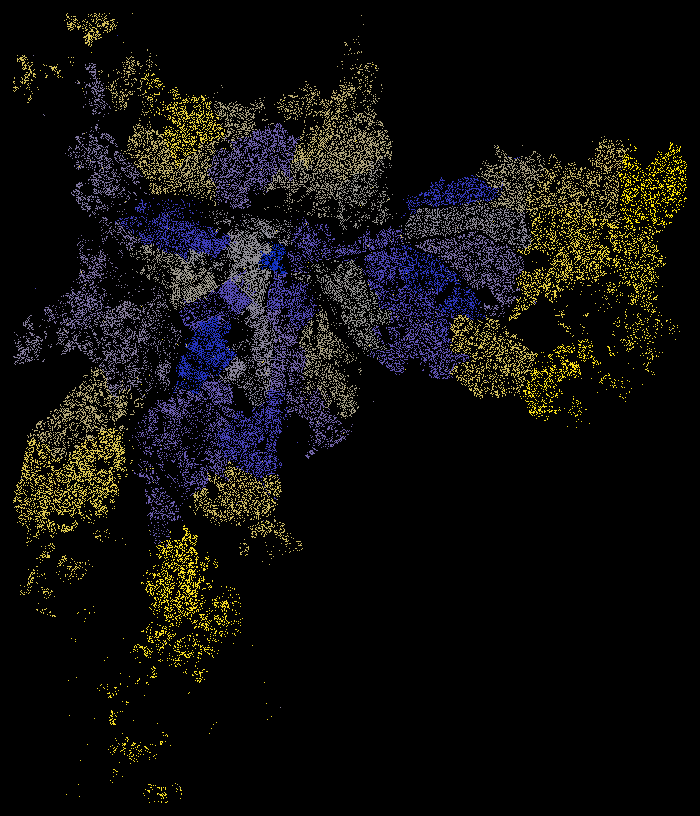

In [ ]:
create_map(sp_delivery_time, bjy, ds.mean(agg_name), 'sao_paulo_avg_delivery_time')

In [ ]:
poa = filter_data('geolocation_city', 'porto alegre').set_index('geolocation_zip_code_prefix_3_digits')
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()
poa_delivery_time = poa.join(gp)
poa_delivery_time[agg_name] = poa_delivery_time['actual_delivery_time']

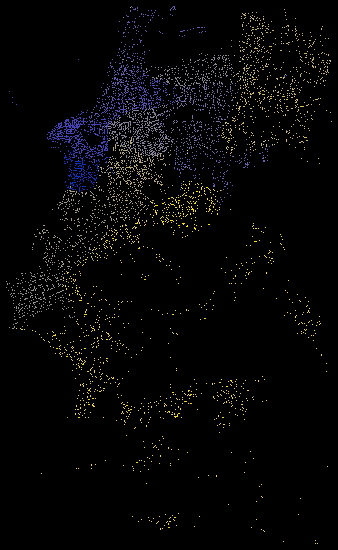

In [ ]:
create_map(poa_delivery_time, bjy, ds.mean(agg_name), 'poa_avg_delivery_time')

## Đơn hàng Điểm đánh giá trung bình
Khách hàng của Bang Rio de Janeiro và Khu vực Đông Bắc có nhiều khả năng cho điểm thấp khi mua hàng.

In [ ]:
gp = orders.groupby('customer_zip_code_prefix_3_digits')['review_score'].mean().to_frame()
score = brazil_geo.join(gp)
agg_name = 'avg_score'
score[agg_name] = score['review_score']

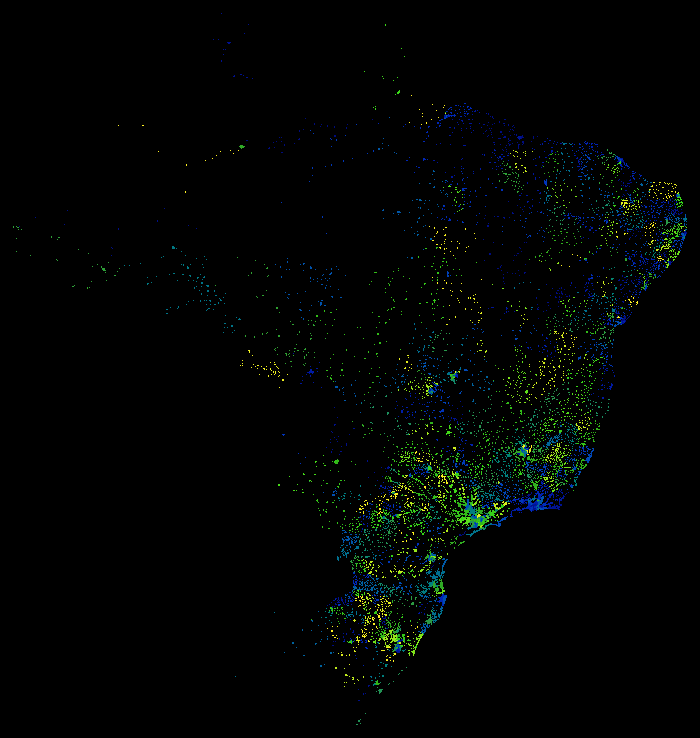

In [ ]:
create_map(score, bgy, ds.mean(agg_name), 'avg_review_score_brazil')

Hãy nhìn vào điểm đánh giá trung bình ở Rio de Janeiro? Bạn có thấy mối quan hệ nào với thời gian giao hàng trung bình không?

In [ ]:
rj_score = riodejaneiro.join(gp)
rj_score[agg_name] = rj_score['review_score']

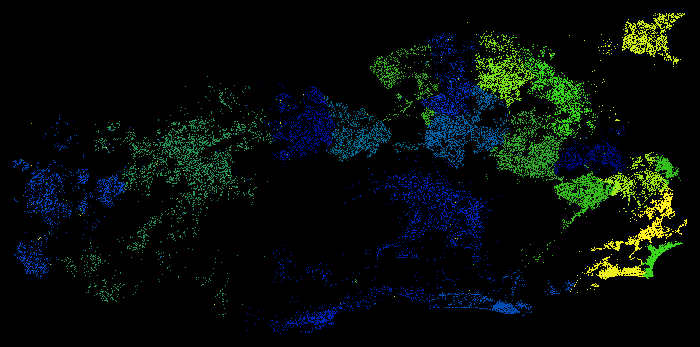

In [ ]:
create_map(rj_score, bgy, ds.mean(agg_name), 'rio_de_janeiro_score')

## Đơn hàng bị trì hoãn
Hãy cùng đo tỷ lệ đơn hàng bị chậm và xem nó có liên quan thế nào đến điểm số mà khách hàng đưa ra?

In [ ]:
orders['is_delayed'] = orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']
gp = orders.groupby('customer_zip_code_prefix_3_digits').agg({'is_delayed': ['sum', 'count']})
agg_name = 'delayed'
gp[agg_name] = gp['is_delayed']['sum'] / gp['is_delayed']['count']
gp = gp[agg_name]
order_delay = brazil_geo.join(gp)

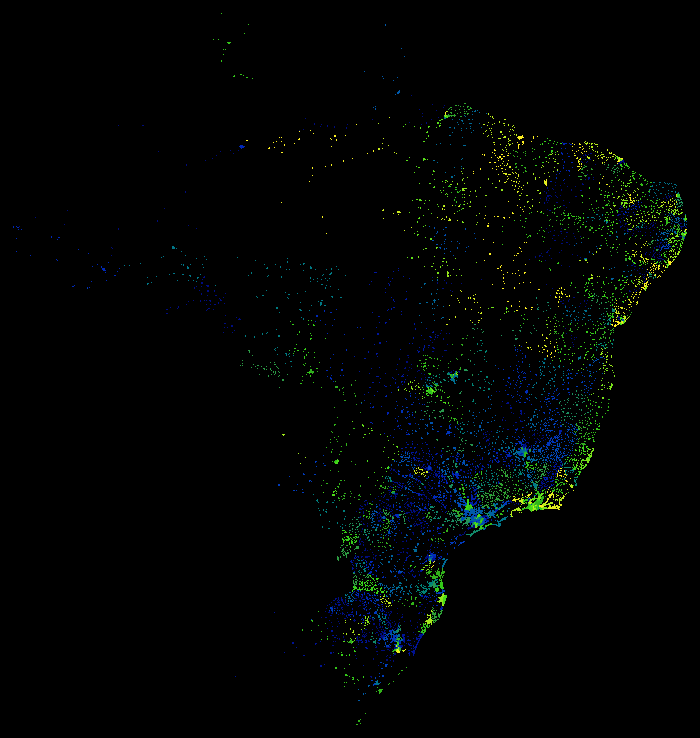

In [ ]:
create_map(order_delay, bgy, ds.mean(agg_name), 'brazil_order_delay_percentage')

Nhìn lại Rio de Janeiro để xem nơi giao hàng dễ bị trì hoãn hơn.

In [ ]:
rj_delay = riodejaneiro.join(gp)

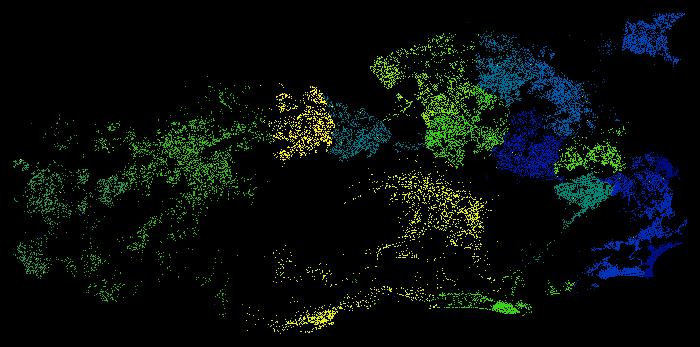

In [ ]:
create_map(rj_delay, bgy, ds.mean(agg_name), 'rio_de_janeiro_order_delay_percentage')

## Khách hàng từ các thị trấn nhỏ có mua nhiều mặt hàng hơn trong một đơn hàng không?
Hãy kiểm tra số lượng mặt hàng trung bình trên mỗi đơn hàng để xem liệu khách hàng ở xa các thành phố lớn có mua số lượng lớn hay không.

In [ ]:
orders['count'] = 1
gp = orders.groupby(['customer_zip_code_prefix_3_digits','order_id'], as_index=False)['count'].count()
gp = gp.groupby('customer_zip_code_prefix_3_digits')['count'].mean().to_frame()
avg_qty = brazil_geo.join(gp)
agg_name = 'avg_qty'
avg_qty[agg_name] = avg_qty['count']

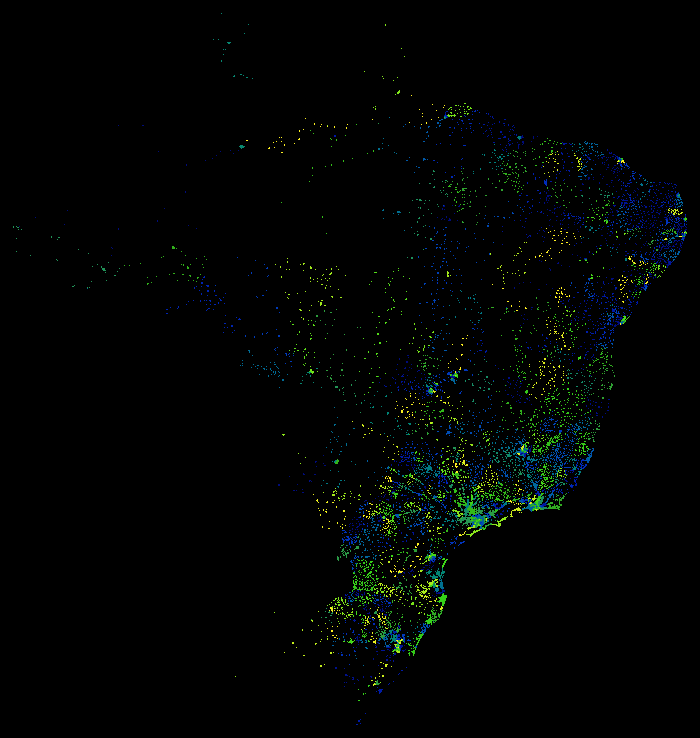

In [ ]:
create_map(avg_qty, bgy, ds.mean(agg_name), 'avg_qty_items')

Rõ ràng giả thuyết đó là sai. Có vẻ như khách hàng từ các thành phố lớn mua nhiều sản phẩm hơn cho mỗi đơn hàng. Nhưng không có một mô hình địa lý rõ ràng nào cho phép chúng ta rút ra bất kỳ kết luận nào thêm.